In [1]:
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
import plotnine as p9

In [2]:
data = pd.read_csv("beauty.csv")
data.head()

,tenured,profnumber,minority,age,beautyf2upper,beautyflowerdiv,beautyfupperdiv,beautym2upper,beautymlowerdiv,beautymupperdiv,...,nonenglish,onecredit,percentevaluating,profevaluation,students,tenuretrack,blkandwhite,btystdvariance,btystdavepos,btystdaveneg
0,0,1,1,36,6,5,7,6,2,4,...,0,0,55.81395,4.7,43,1,0,2.129806,0.201567,0.000000
1,1,2,0,59,2,4,4,3,2,3,...,0,0,85.00000,4.6,20,1,0,1.386081,0.000000,-0.826081
2,1,3,0,51,5,5,2,3,2,3,...,0,0,100.00000,4.1,55,1,0,2.537435,0.000000,-0.660333
3,1,4,0,40,4,2,5,2,3,3,...,0,0,86.95652,4.5,46,1,0,1.760577,0.000000,-0.766312
4,0,5,0,31,9,7,9,6,7,6,...,0,0,87.50000,4.8,48,1,0,1.693100,1.421450,0.000000


In [3]:
data_to_learn = data[0:400].copy()
data_to_predict = data[400:].copy()
model = smf.ols(formula = 'courseevaluation ~ btystdave', data = data_to_learn).fit()
outcome = model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     7.050
Date:                Mon, 16 Dec 2019   Prob (F-statistic):            0.00824
Time:                        00:26:00   Log-Likelihood:                -323.20
No. Observations:                 400   AIC:                             650.4
Df Residuals:                     398   BIC:                             658.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0048      0.028    144.473      0.000       3.950       4.059
btystdave      0.0992      0.037      2.655      0.008       0.026       0.173
==============================================================================
Omnibus:                       15.436   Durbin-Watson:                   1.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.573
Skew:                          -0.498   Prob(JB):                     0.000252
Kurtosis:                       2.954   Cond. No.                         1.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

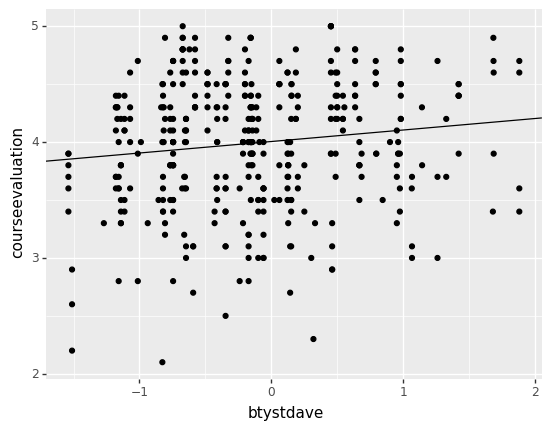

<ggplot: (8766339117921)>

In [4]:
fig1=(p9.ggplot(p9.aes(x='btystdave',y='courseevaluation'),data=data_to_learn)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=outcome['Intercept'], slope=outcome['btystdave'])))
fig1

#### Powyzszy wykres wskazuje slabe dopasowanie modelu - punkty nie sa skupione przy osi. Jest jednak widoczna zaleznosc polegajaca na tym ze prowadzacy z niskim wskaznikiem btystdave czesciej otrzymywali slabe oceny, a odwrotnie prowadzacy z wysokim btystdave


In [5]:
data_to_predict['evaluation_predicted'] = model.predict(data_to_predict['btystdave'])
data_to_predict['evaluation_res'] = data_to_predict['courseevaluation'] - data_to_predict['evaluation_predicted']
data_to_show = data_to_predict['courseevaluation'].copy()

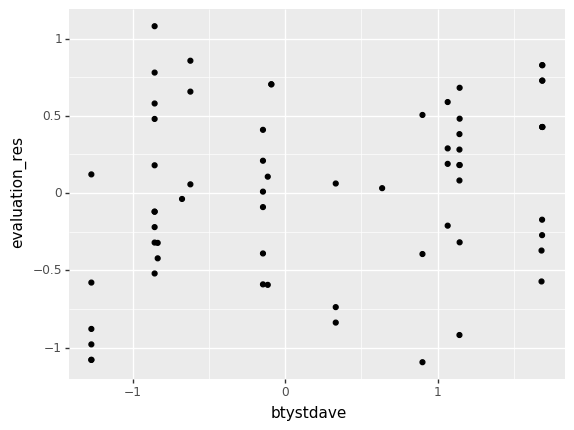

<ggplot: (8766339029073)>

In [6]:
fig_res=(p9.ggplot(p9.aes(x='btystdave',y='evaluation_res'),data=data_to_predict)
      +p9.geom_point())
fig_res

#### Wykres residuow potwierdza slabe dopasowanie modelu - niewiele punktow sytuuje sie w poblizu zera

## Badanie zaleznosci oceny kursu od wieku prowadzacego

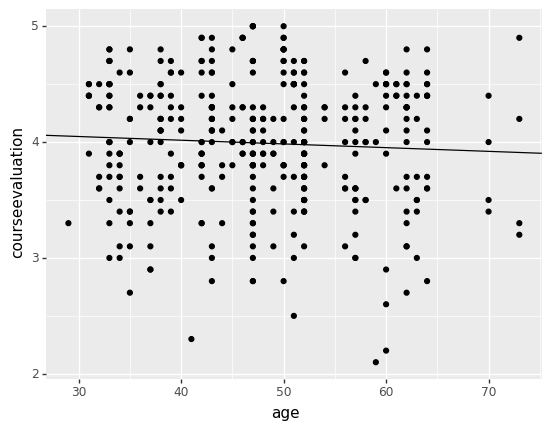

<ggplot: (8766339034969)>

In [7]:
model_a = smf.ols(formula = 'courseevaluation ~ age', data = data_to_learn).fit()
outcome_a = model_a.params
fig_a=(p9.ggplot(p9.aes(x='age',y='courseevaluation'),data=data_to_learn)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=outcome_a['Intercept'], slope=outcome_a['age'])))
fig_a

#### Takze slabe dopasowanie - os prawie pozioma co wskazuje na brak bezposredniej zaleznosci oceny kursu od wieku prowadzacego, rysowanie wykresu residuow mija sie z celem

## Badanie zaleznosci oceny kursu od kombinacji piekna i wieku
### Potrzebne dostosowanie zakresu wartosci zmiennej age - przeskalowanie do przedzialu <0,1>:

In [8]:
age = data_to_learn['age']
min_age = min(age)
max_age = max(age)

In [9]:
print(min_age, max_age)

29 73


#### Wiekowi najstarszego prowadzacego odpowiada wartosc 0, a wiekowi najmlodszego wartosc 1:

In [15]:
data_to_learn['age_standarized'] = -1*((data_to_learn['age'] - min_age)/(max_age-min_age)) + 1
data_to_predict['age_standarized'] = -1*((data_to_predict['age'] - min_age)/(max_age-min_age)) + 1

In [11]:
data_to_learn['age_standarized'].head

<bound method NDFrame.head of 0      0.840909
1      0.318182
2      0.500000
3      0.750000
4      0.954545
         ...   
395    0.795455
396    0.795455
397    0.795455
398    0.795455
399    0.681818
Name: age_standarized, Length: 400, dtype: float64>

In [12]:
model_2 = smf.ols(formula = 'courseevaluation ~ btystdave + age_standarized', data = data_to_learn).fit()
outcome_2 = model_2.params
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3.588
Date:                Mon, 16 Dec 2019   Prob (F-statistic):             0.0286
Time:                        00:26:02   Log-Likelihood:                -323.12
No. Observations:                 400   AIC:                             652.2
Df Residuals:                     397   BIC:                             664.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.9767      0.080     49.755      0.000       3.820       4.134
btystdave           0.0948      0.039      2.419      0.016       0.018       0.172
age_standarized     0.0481      0.128      0.375      0.708      -0.204       0.301
==============================================================================
Omnibus:                       15.273   Durbin-Watson:                   1.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.384
Skew:                          -0.495   Prob(JB):                     0.000277
Kurtosis:                       2.952   Cond. No.                         6.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Wykres pogladowy:

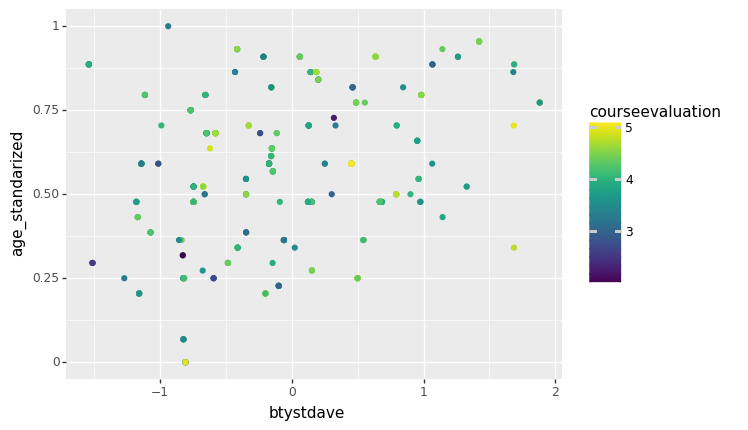

<ggplot: (8766339117977)>

In [13]:
fig3=(p9.ggplot(p9.aes(x='btystdave',y='age_standarized',color='courseevaluation'),data=data_to_learn)
      +p9.geom_point())
fig3

In [18]:
data_to_predict['ev_based_on_age_bty'] = model_2.predict(data_to_predict[['btystdave','age_standarized']])
data_to_predict['ev_res'] = data_to_predict['courseevaluation'] - data_to_predict['ev_based_on_age_bty']

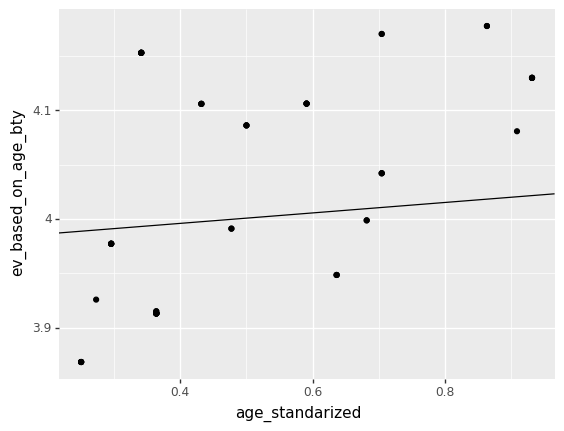

<ggplot: (8766338739857)>

In [22]:
fig4=(p9.ggplot(p9.aes(x='age_standarized',y='ev_based_on_age_bty'),data=data_to_predict)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=outcome_2['Intercept'],slope=outcome_2['age_standarized'])))
fig4

#### Tym razem takze slabe dopasowanie modelu ale wyraznie widoczna zaleznosc: im mlodszy wykladowca tym wieksze prawdopodobienstwo ze jego ocena jest wysoka

#### Wykres residuow:

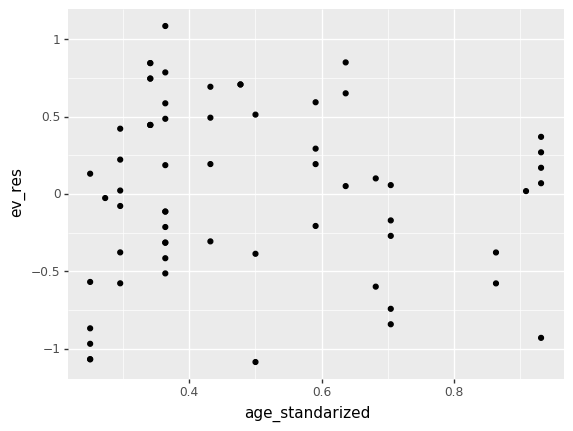

<ggplot: (8766338750169)>

In [23]:
fig4=(p9.ggplot(p9.aes(x='age_standarized',y='ev_res'),data=data_to_predict)
      +p9.geom_point())
fig4